In [1]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, roc_curve, roc_auc_score

import warnings
warnings.filterwarnings("ignore")


In [2]:
df = pd.read_csv("../Datasets/Salary_Data.csv")
df.head()

,YearsExperience,Salary
0,1.1,39343
1,1.3,46205
2,1.5,37731
3,2.0,43525
4,2.2,39891


In [3]:
df.shape

(30, 2)

In [4]:
df.describe()

,YearsExperience,Salary
count,30.000000,30.000000
mean,5.313333,76003.000000
std,2.837888,27414.429785
min,1.100000,37731.000000
25%,3.200000,56720.750000
50%,4.700000,65237.000000
75%,7.700000,100544.750000
max,10.500000,122391.000000


In [5]:
df.isna().sum()

YearsExperience    0
Salary             0
dtype: int64

In [6]:
df.dtypes

YearsExperience    float64
Salary               int64
dtype: object

<Figure size 1000x500 with 0 Axes>

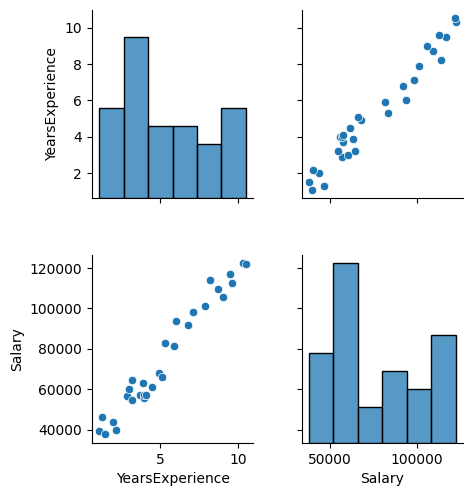

In [7]:
plt.figure(figsize=(10,5))
sns.pairplot(df)
plt.subplots_adjust(wspace=0.3, hspace=0.3)

Defining the input feature and the target variable

In [8]:
X = df.drop("Salary", axis=1)
Y = df["Salary"]

Splitting the data into train and test sets

In [9]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=11) 

In [10]:
print(X_train.shape, X_test.shape)

(24, 1) (6, 1)


Model Fitting

In [11]:
model = LinearRegression()
model.fit(X_train, Y_train)

LinearRegression()

$\beta_{0}$

In [12]:
model.intercept_

25375.305271282858

$\beta_{1}$

In [13]:
model.coef_[0]

9504.982481093459

Making predictions with the trained model

In [14]:
y_pred = model.predict(X_test)

Checking the performance of the model

In [15]:
R2 = r2_score(Y_test, y_pred)
R2

0.940882728477622

Checking the Mean Squared and Mean Absolute Errors

In [16]:
MSE = mean_squared_error(Y_test, y_pred)
MAE = mean_absolute_error(Y_test, y_pred)

print(f"Mean Squared Error: {MSE:.2f}")
print(f"Mean Absolute Error: {MAE:.2f}")

Mean Squared Error: 31727520.87
Mean Absolute Error: 4780.51


Text(0.5, 0, 'Years of Experience')

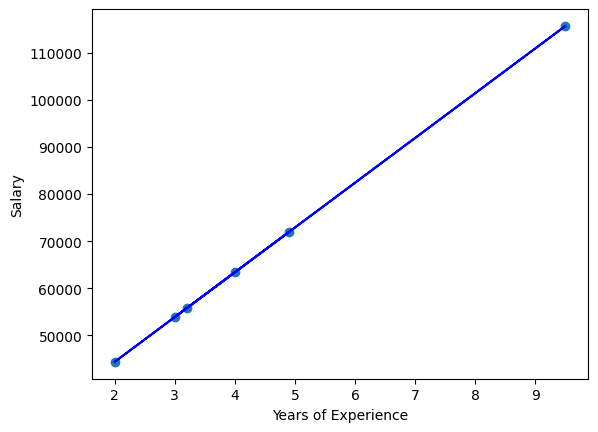

In [17]:
# Plotting

plt.scatter(X_test, y_pred,label='True values')
plt.plot(X_test, y_pred, 'b',label='Predictions')
plt.ylabel("Salary")
plt.xlabel("Years of Experience")

# Logistic Regression

In [18]:
# Reading dataset
df = pd.read_csv('../Datasets/logistic_regression_dataset-Social_Network_Ads.csv')
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [19]:
data = df.copy()

In [20]:
data.shape

(400, 5)

In [21]:
data.describe()

,User ID,Age,EstimatedSalary,Purchased
count,4.000000e+02,400.000000,400.000000,400.000000
mean,1.569154e+07,37.655000,69742.500000,0.357500
std,7.165832e+04,10.482877,34096.960282,0.479864
min,1.556669e+07,18.000000,15000.000000,0.000000
25%,1.562676e+07,29.750000,43000.000000,0.000000
50%,1.569434e+07,37.000000,70000.000000,0.000000
75%,1.575036e+07,46.000000,88000.000000,1.000000
max,1.581524e+07,60.000000,150000.000000,1.000000


In [22]:
data.dtypes

User ID             int64
Gender             object
Age                 int64
EstimatedSalary     int64
Purchased           int64
dtype: object

In [23]:
data['Purchased'].unique()

array([0, 1], dtype=int64)

In [24]:
data.isna().sum()

User ID            0
Gender             0
Age                0
EstimatedSalary    0
Purchased          0
dtype: int64

In [25]:
# Encoding data using dictionary
gender_dict = {'Male': 0, 'Female': 1}
data['Gender_encoded'] = data['Gender'].map(gender_dict)
data

,User ID,Gender,Age,EstimatedSalary,Purchased,Gender_encoded
0,15624510,Male,19,19000,0,0
1,15810944,Male,35,20000,0,0
2,15668575,Female,26,43000,0,1
3,15603246,Female,27,57000,0,1
4,15804002,Male,19,76000,0,0
...,...,...,...,...,...,...
395,15691863,Female,46,41000,1,1
396,15706071,Male,51,23000,1,0
397,15654296,Female,50,20000,1,1
398,15755018,Male,36,33000,0,0


In [26]:
# Take relevant columns (removed User ID and Gender)
cols = ['Age', 'EstimatedSalary', 'Purchased','Gender_encoded']

In [27]:
# Normalisation of Ages and EstimatedSalary
data[['Age', 'EstimatedSalary']] = StandardScaler().fit_transform(data[['Age', 'EstimatedSalary']])

In [28]:
data[cols]

,Age,EstimatedSalary,Purchased,Gender_encoded
0,-1.781797,-1.490046,0,0
1,-0.253587,-1.460681,0,0
2,-1.113206,-0.785290,0,1
3,-1.017692,-0.374182,0,1
4,-1.781797,0.183751,0,0
...,...,...,...,...
395,0.797057,-0.844019,1,1
396,1.274623,-1.372587,1,0
397,1.179110,-1.460681,1,1
398,-0.158074,-1.078938,0,0


In [29]:
# Select features and target columns
target = data['Purchased']
features = data[['Age', 'EstimatedSalary', 'Gender_encoded']]

features

,Age,EstimatedSalary,Gender_encoded
0,-1.781797,-1.490046,0
1,-0.253587,-1.460681,0
2,-1.113206,-0.785290,1
3,-1.017692,-0.374182,1
4,-1.781797,0.183751,0
...,...,...,...
395,0.797057,-0.844019,1
396,1.274623,-1.372587,0
397,1.179110,-1.460681,1
398,-0.158074,-1.078938,0


In [30]:
# Split dataset for training and testing
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=111)

In [31]:
print(X_train.shape, X_test.shape)

(320, 3) (80, 3)


In [32]:
# Initialization of Logistic Regression model
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [33]:
weight_df = pd.DataFrame(
    {'features': ['Age', 'EstimatedSalary', 'Gender_encoded'],
    'weights': model.coef_.tolist()[0]
    }
)
weight_df

,features,weights
0,Age,2.005549
1,EstimatedSalary,1.057409
2,Gender_encoded,-0.146714


In [34]:
pred_train = model.predict(X_train)

In [35]:
# Accuracy on training set
acc_train = accuracy_score(y_train, pred_train)
print(f"Accuracy of training set {acc_train}")

Accuracy of training set 0.834375


In [36]:
model.predict_proba(X_train)

array([[0.89772677, 0.10227323],
       [0.98310146, 0.01689854],
       [0.63613377, 0.36386623],
       [0.70246999, 0.29753001],
       [0.55027235, 0.44972765],
       [0.45490322, 0.54509678],
       [0.58831997, 0.41168003],
       [0.91617975, 0.08382025],
       [0.8669413 , 0.1330587 ],
       [0.95919541, 0.04080459],
       [0.98167218, 0.01832782],
       [0.95736129, 0.04263871],
       [0.51162735, 0.48837265],
       [0.99298   , 0.00702   ],
       [0.7025667 , 0.2974333 ],
       [0.98255206, 0.01744794],
       [0.90905375, 0.09094625],
       [0.91856828, 0.08143172],
       [0.02484393, 0.97515607],
       [0.96035397, 0.03964603],
       [0.7053444 , 0.2946556 ],
       [0.73959971, 0.26040029],
       [0.87202944, 0.12797056],
       [0.14809364, 0.85190636],
       [0.98822348, 0.01177652],
       [0.72585862, 0.27414138],
       [0.65696748, 0.34303252],
       [0.3139302 , 0.6860698 ],
       [0.7078337 , 0.2921663 ],
       [0.64580282, 0.35419718],
       [0.

In [37]:
model.classes_

array([0, 1], dtype=int64)

In [38]:
pred_test = model.predict(X_test)
y_probs = model.predict_proba(X_test)[:, 1]

In [39]:
acc_test = accuracy_score(y_test, pred_test)
print(f"Accuracy of training set {acc_test}")

Accuracy of training set 0.8625


In [40]:
# Showing confusion matrix
mat = confusion_matrix(y_test, pred_test)

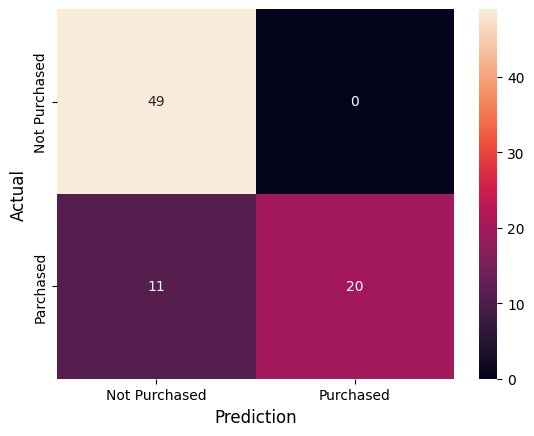

In [41]:
# define and print matrix with labels
sns.heatmap(mat,
            annot=True,
            fmt='g',
            xticklabels=['Not Purchased','Purchased'],
            yticklabels=['Not Purchased','Parchased'])

# display matrix
plt.ylabel('Actual',fontsize=12)
plt.xlabel('Prediction',fontsize=12)
plt.show()

$$\text{Precision score} = \frac{TP}{TP + FP}$$

In [42]:
precision_score(y_test, pred_test)

1.0

$$\text{Recall score} = \frac{TP}{TP = FN}$$

In [43]:
recall_score(y_test, pred_test)

0.6451612903225806

$$\text{f1-Score} = 2 \cdot \frac{Precision \cdot Recall}{Precision + Recall}$$

In [44]:
f1_score(y_test, pred_test)

0.7843137254901961

$$\text{False Positive Rate (FPR)} = \frac{FP}{TN + FP}$$

In [45]:
fpr, tpr, thresholds = roc_curve(y_test, y_probs)
auc_score = roc_auc_score(y_test, y_probs)
print("AUC:", auc_score)

AUC: 0.978275181040158


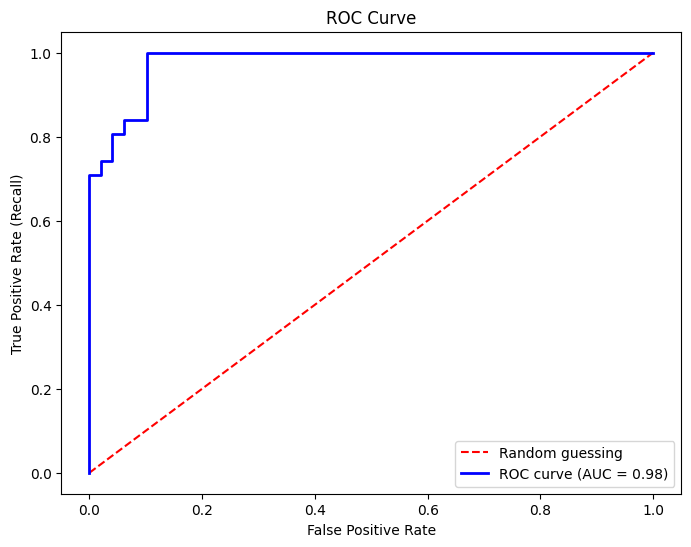

In [46]:
plt.figure(figsize=(8,6))
plt.plot([0,1], [0,1], color='red', linestyle='--', label='Random guessing')
plt.plot(fpr, tpr, color='blue', label=f'ROC curve (AUC = {auc_score:.2f})', lw=2)
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate (Recall)")
plt.title("ROC Curve")
plt.legend()
plt.show()
